## Setup

In [1]:
import pandas as pd
from pandas.io import sql
import sqlite3
import timeit
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

! pwd

/Users/nicholasbeaudoin/Desktop/ShotLink Analytics


In [2]:
# Create SQl DB connection
conn = sqlite3.connect('Shotlink.db')

In [3]:
# Query data for Tiger Woods
df = sql.read_sql("""SELECT * FROM PGA_stats 
                WHERE PlayerLastName = 'Woods'""", con=conn)
print(len(df))

39140


## Longest hole-out for Woods

In [4]:
# Longest hole-out; subset to all shots that went into hole
new_df = df[(df['IntheHoleFlag'] == 'Y')]

# Farthest hole out in subset df
max_distance = new_df[(new_df['DistanceYds']) == max(new_df['DistanceYds'])]
max_distance

# Get the distance only
distance = max_distance['DistanceYds'].values[0]
distance

130

## Longest tee shot for Woods

In [5]:
# Longest drive in subset df
max_distance = df[(df['DistanceYds']) == max(df['DistanceYds'])]
max_distance

# Get the distance only
distance = max_distance['DistanceYds'].values[0]
distance

439

## Tiger Woods Fairway Percentage (2003-2018)

In [6]:
# Create unique years
years = set(df['Year'])

# Create dictionary to store years and percentages
dict = {}

# Loop through years and find Tiger's average fairway percetnage
for year in years:
    
    df_year = df[df['Year'] == year]
    
    # Subset for par 4/5s
    new_df = df_year[(df_year['ParValue'] == '04') | (df_year['ParValue'] == '05')]
    
    # Just tee shots (ignore NaN values)
    tee_shot_45_df = new_df[(new_df['Shot'] == 1) & (new_df['To Location(Scorer)'].notnull())]
    
    # Subset to greens and fairways (ignore NaN values)
    greens_fairways_df = tee_shot_45_df[(tee_shot_45_df['To Location(Scorer)'] == 'Green') | (tee_shot_45_df['To Location(Scorer)'] == 'Fairway')]
    
    # Calculate percentage fairways
    percentage = len(greens_fairways_df)/len(tee_shot_45_df)
    
    print(year)
    print(percentage)
    
    # Add to dictionary
    dict[year] = percentage

2007
0.6022727272727273
2010
0.47835497835497837
2014
0.5042016806722689
2003
0.6441798941798942
2006
0.6015037593984962
2005
0.5379901960784313
2015
0.5565476190476191
2012
0.5890603085553997
2004
0.5723350253807107
2011
0.4025974025974026
2017
0.14285714285714285
2018
0.5784574468085106
2009
0.5892857142857143
2013
0.6103896103896104
2008
0.5238095238095238


In [7]:
# Convert dictionary into Pandas DF
fairway_df = pd.DataFrame()
fairway_df['Year'] = dict.keys()
fairway_df['percentage'] = dict.values()

In [8]:
# Sort the values
fairway_df = fairway_df.sort_values(by='Year', ascending=True)

In [9]:
fairway_df.head()

,Year,percentage
3,2003,0.644180
8,2004,0.572335
5,2005,0.537990
4,2006,0.601504
0,2007,0.602273


In [14]:
# Convert decimals into percentages
fairway_df['Percent'] = fairway_df['percentage'] * 100
fairway_df = fairway_df.reset_index(drop=True)

In [15]:
fairway_df.head()

,Year,percentage,Percent
0,2003,0.644180,64.417989
1,2004,0.572335,57.233503
2,2005,0.537990,53.799020
3,2006,0.601504,60.150376
4,2007,0.602273,60.227273


Text(-0.5,69,'Fairways hit heavily correlate with position on the leaderboard and success versus the field')

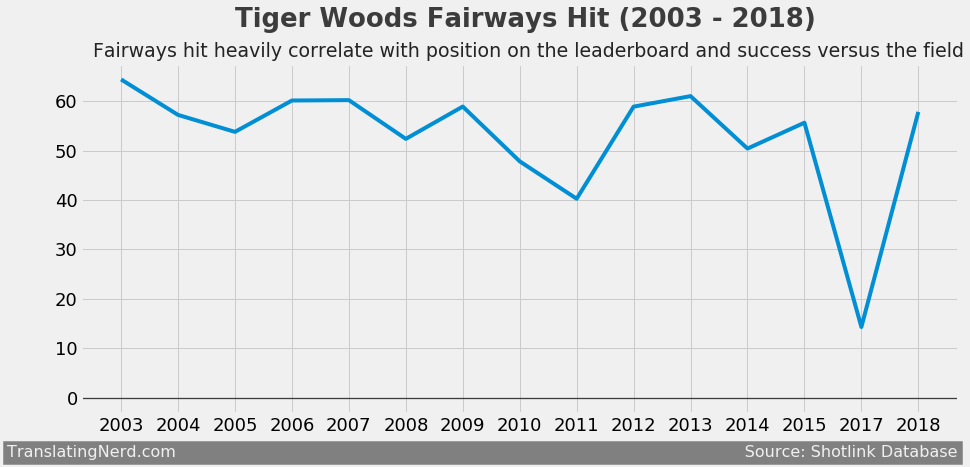

In [153]:
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import rcParams

fairways_graph = fairway_df.plot(kind='line', x='Year', y='Percent', figsize = (14,6), legend = False)
plt.xticks(fairway_df.index, fairway_df['Year'])
fairways_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fairways_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fairways_graph.xaxis.label.set_visible(False)
fairways_graph.text(x=-2, y=-12, s = 'TranslatingNerd.com                                                                                                               Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

fairways_graph.text(x = 2, y = 75, s = "Tiger Woods Fairways Hit (2003 - 2018)",
               fontsize = 26, weight = 'bold', alpha = .75)
fairways_graph.text(x = -.5, y = 69, 
               s = 'Fairways hit heavily correlate with position on the leaderboard and success versus the field',
              fontsize = 19, alpha = .85)

# Graphing source: https://www.dataquest.io/blog/making-538-plots/

## TW Fairways in 2018

In [ ]:
# Data is screwy for Torrey Pines (North) in 2018
df[df['CourseName'] == 'Torrey Pines (North)'].head()

In [341]:
# Subset to year 2018
subset_df = df[df['Year'] == '2018']

# Create unique courses 
courses = set(subset_df['CourseName'])

# Remove Torrey Pines (North)
courses.remove('Torrey Pines (North)')

# Create lists to add results to
course_list = []
percentage_list = []
position_list = []

# Loop through years and find Tiger's average GIR percetage
# Careful to not include courses he didn't play because the denominator will be zero


for course in courses:
    #print(course)

    df_course = subset_df[(subset_df['CourseName'] == course)]

    # Subset for par 4/5s
    new_df = df_course[(df_course['ParValue'] == '04') | (df_course['ParValue'] == '05')]

    # Just tee shots (ignore NaN values)
    tee_shot_45_df = new_df[(new_df['Shot'] == 1) & (new_df['To Location(Scorer)'].notnull())]

    # Subset to greens and fairways (ignore NaN values)
    greens_fairways_df = tee_shot_45_df[(tee_shot_45_df['To Location(Scorer)'] == 'Green') | (tee_shot_45_df['To Location(Scorer)'] == 'Fairway')]

    # Calculate percentage fairways
    percentage = len(greens_fairways_df)/len(tee_shot_45_df)
    
    # Get the tournament order position
    position = greens_fairways_df.index.get_values()[0]
    
#     print(course)
#     print(percentage)
#     print(position)
    
    course_list.append(course)
    percentage_list.append(percentage)
    position_list.append(position)

# Convert zipped list to pandas DF
final_df = pd.DataFrame(list(zip(course_list, percentage_list, position_list)),
              columns=['Course','Percentage', 'Position'])

final_df

,Course,Percentage,Position
0,Quail Hollow Club,0.446429,36656
1,PGA National (Champion),0.589286,35810
2,TPC Sawgrass,0.625000,36948
3,Muirfield Village GC,0.714286,37216
4,TPC Potomac at Avenel Farm,0.571429,37496
5,Torrey Pines GC (South),0.333333,35452
6,Riviera CC,0.428571,35661
7,Innisbrook Resort (Copperhead),0.596154,36094
8,Bay Hill Club & Lodge,0.607143,36382
9,Firestone CC (South),0.464286,37785


In [373]:
# Reset index by tournament position in the PGA Tour season
fairway_df_2018 = final_df.sort_values(by='Position')
fairway_df_2018.reset_index(inplace=True)

fairway_df_2018['Percent'] = fairway_df_2018['Percentage'] * 100
fairway_df_2018

,index,Course,Percentage,Position,Percent
0,5,Torrey Pines GC (South),0.333333,35452,33.333333
1,6,Riviera CC,0.428571,35661,42.857143
2,1,PGA National (Champion),0.589286,35810,58.928571
3,7,Innisbrook Resort (Copperhead),0.596154,36094,59.615385
4,8,Bay Hill Club & Lodge,0.607143,36382,60.714286
5,0,Quail Hollow Club,0.446429,36656,44.642857
6,2,TPC Sawgrass,0.625000,36948,62.500000
7,3,Muirfield Village GC,0.714286,37216,71.428571
8,4,TPC Potomac at Avenel Farm,0.571429,37496,57.142857
9,9,Firestone CC (South),0.464286,37785,46.428571


Text(-0.5,85,'         A few stumbles alone the way, but TW driving improves drastically')

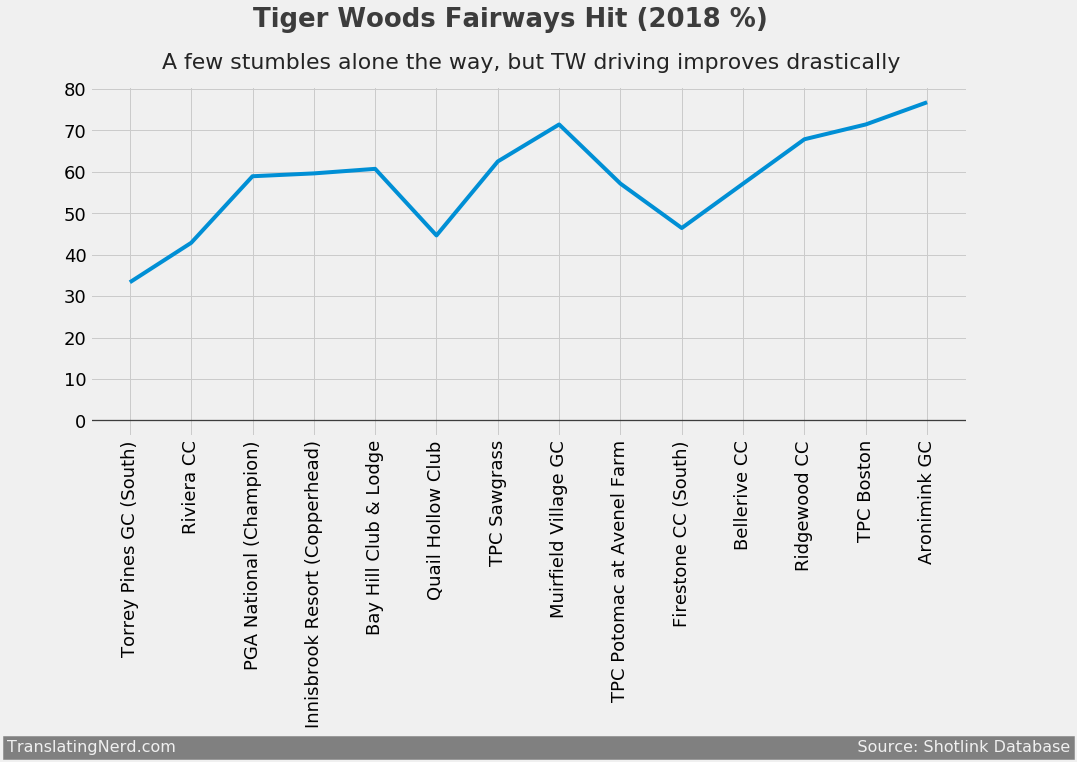

In [393]:
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import rcParams

fairways_graph_2018 = fairway_df_2018.plot(kind='line', x='Course', y='Percent', figsize = (14,6), legend = False, rot=90)
plt.xticks(fairway_df_2018.index, fairway_df_2018['Course'])
fairways_graph_2018.tick_params(axis = 'both', which = 'major', labelsize = 18)
fairways_graph_2018.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

fairways_graph_2018.xaxis.label.set_visible(False)
fairways_graph_2018.text(x=-2, y=-80, s = 'TranslatingNerd.com                                                                                                                                     Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

fairways_graph_2018.text(x = 2, y = 95, s = "Tiger Woods Fairways Hit (2018 %)",
              fontsize = 26, weight = 'bold', alpha = .75)
fairways_graph_2018.text(x = -.5, y = 85, 
             s = '         A few stumbles alone the way, but TW driving improves drastically',
           fontsize = 22, alpha = .85)

# Graphing source: https://www.dataquest.io/blog/making-538-plots/

In [ ]:
# Add Tournament finish to DF

# Torrey Pines 23
# Riviera Country Club MC
# PGA National Champion Course 12
# Innisbrook Resort (Copperhead) 2
# Bay Hill Club & Lodge 5
# Quail Hollow Club 55
# TPC Sawgrass 11 
# Muirfield Village GC 23 
# TPC Potomac at Avenel Farm 4
# Firestone CC (South Course) 6
# Bellerive Country Club 2
# Ridgewood Country Club 40
# TPC Boston 24
# Aronimink GC 6

In [402]:
tournament_finish = [23,77,12,2,5,55,11,23,4,6,2,40,24,6]
se = pd.Series(tournament_finish)
fairway_df_2018['Finish'] = se.values
fairway_df_2018

,index,Course,Percentage,Position,Percent,Finish
0,5,Torrey Pines GC (South),0.333333,35452,33.333333,23
1,6,Riviera CC,0.428571,35661,42.857143,77
2,1,PGA National (Champion),0.589286,35810,58.928571,12
3,7,Innisbrook Resort (Copperhead),0.596154,36094,59.615385,2
4,8,Bay Hill Club & Lodge,0.607143,36382,60.714286,5
5,0,Quail Hollow Club,0.446429,36656,44.642857,55
6,2,TPC Sawgrass,0.625000,36948,62.500000,11
7,3,Muirfield Village GC,0.714286,37216,71.428571,23
8,4,TPC Potomac at Avenel Farm,0.571429,37496,57.142857,4
9,9,Firestone CC (South),0.464286,37785,46.428571,6


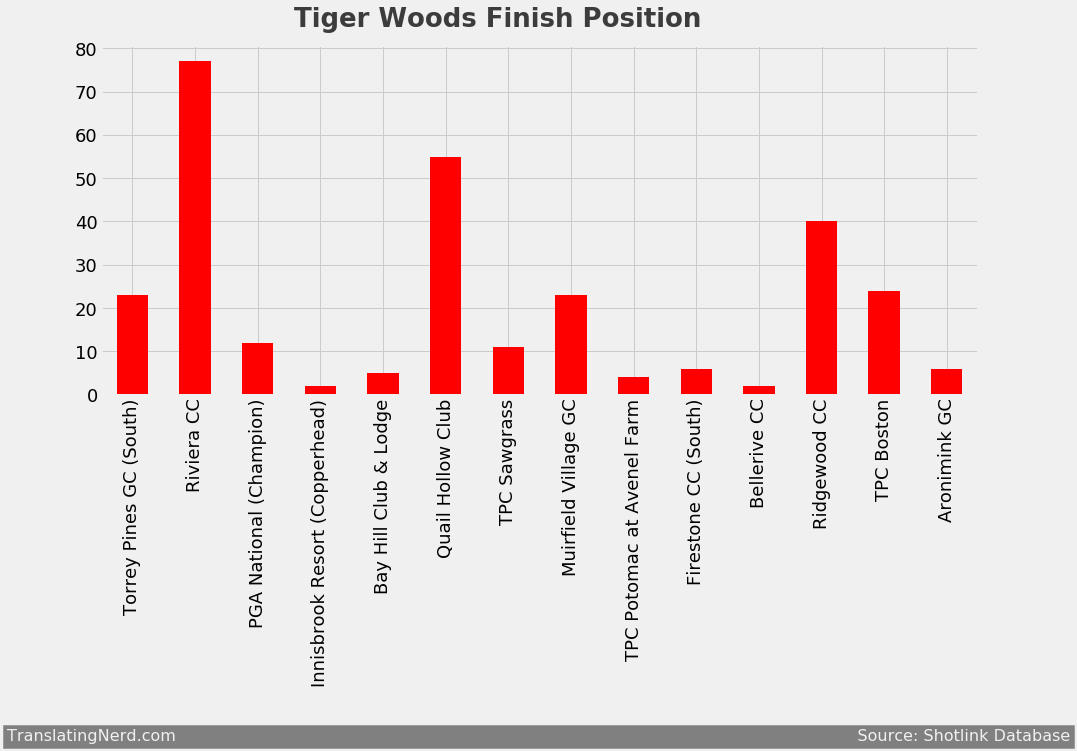

In [467]:
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np


finish_graph_2018 = fairway_df_2018.plot(color='r', kind='bar', x='Course', y='Finish', figsize = (14,6), legend = False, rot=90)
plt.xticks(fairway_df_2018.index, fairway_df_2018['Course'])

finish_graph_2018.tick_params(axis = 'both', which = 'major', labelsize = 18)
finish_graph_2018.axhline(y = 0, color = 'black', linewidth = 2, alpha = .7)

finish_graph_2018.xaxis.label.set_visible(False)
finish_graph_2018.text(x=-2, y=-80, s = 'TranslatingNerd.com                                                                                                                                     Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

finish_graph_2018.text(x = 2, y = 85, s = "    Tiger Woods Finish Position",
              fontsize = 26, weight = 'bold', alpha = .75);


# Graphing source: https://www.dataquest.io/blog/making-538-plots/